# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.groupby(['class']).mean()

,variance,skewness,curtosis,entropy
class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [6]:
df.groupby(['entropy']).mean()

,variance,skewness,curtosis,class
entropy,,,,
-8.5482,-2.6989,12.19840,0.676610,0.0
-7.8719,-1.9667,11.80520,-0.404720,0.0
-7.7853,-2.2153,11.96250,0.078538,0.0
-7.7581,-2.2623,12.11770,0.288460,0.0
-7.6612,-2.4473,12.62470,0.735730,0.0
...,...,...,...,...
2.0862,3.3951,1.14840,2.140100,0.0
2.1353,-2.5701,-6.84520,8.999900,1.0
2.1547,3.5438,1.23950,1.997000,0.0


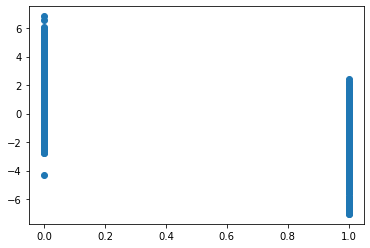

In [7]:
plt.scatter('class','variance',data= df)

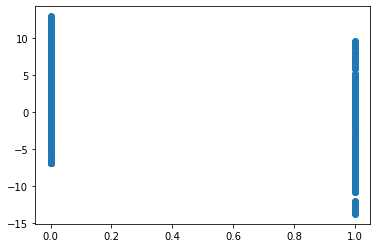

In [8]:
plt.scatter('class','skewness',data=df)

In [9]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [10]:
X=df.iloc[:,:-1]
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


# Performing PCA technique

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X=StandardScaler().fit_transform(X)

In [13]:
# Make an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

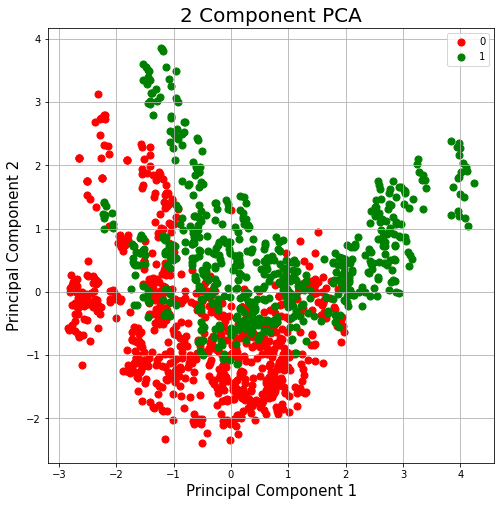

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df.loc[:, 'class'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

In [16]:
pca.explained_variance_ratio_

array([0.54497602, 0.32328872])

In [17]:
sum(pca.explained_variance_ratio_)

0.868264743372137

# performing K-Means clustering

In [27]:
features = ['variance','curtosis']

# Create features matrix
X = df.loc[:, features].values

In [28]:
X = StandardScaler().fit_transform(X)

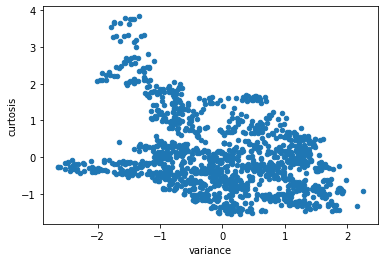

In [29]:
# Plot 
pd.DataFrame(X, columns = features).plot.scatter('variance','curtosis' )

# Add labels
plt.xlabel('variance');
plt.ylabel('curtosis');

In [33]:
from sklearn.cluster import KMeans

In [42]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=1)

# Fit only on a features matrix
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

In [43]:
# Get labels and cluster centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [44]:
X = pd.DataFrame(X, columns = features)

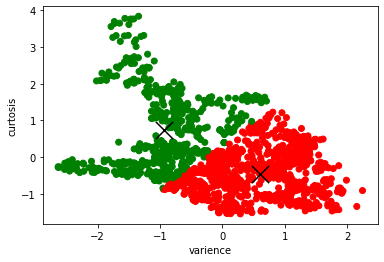

In [45]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X['variance'], X['curtosis'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('varience')
plt.ylabel('curtosis');

In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Visually evaluate the clusters and compare with Class 

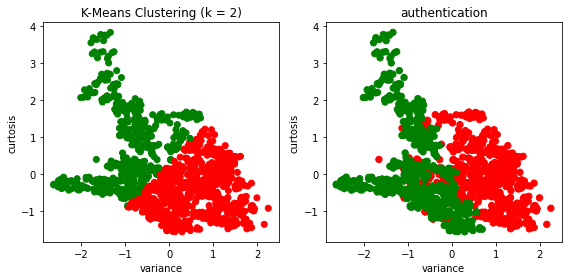

In [47]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(X['variance'], X['curtosis'], c=colormap[labels])
plt.xlabel('variance')
plt.ylabel('curtosis');
plt.title('K-Means Clustering (k = 2)')
 
plt.subplot(1, 2, 2)
plt.scatter(X['variance'], X['curtosis'], c=colormap[y], s=40)
plt.xlabel('variance')
plt.ylabel('curtosis');
plt.title('authentication')

plt.tight_layout()